Mounted at /content/drive
First 5 rows of the dataset:
   age           job  marital  education default  balance housing loan  contact  day month  duration  campaign  pdays  previous poutcome   y
0   58    management  married   tertiary      no     2143     yes   no  unknown    5   may       261         1     -1         0  unknown  no
1   44    technician   single  secondary      no       29     yes   no  unknown    5   may       151         1     -1         0  unknown  no
2   33  entrepreneur  married  secondary      no        2     yes  yes  unknown    5   may        76         1     -1         0  unknown  no
3   47   blue-collar  married    unknown      no     1506     yes   no  unknown    5   may        92         1     -1         0  unknown  no
4   33       unknown   single    unknown      no        1      no   no  unknown    5   may       198         1     -1         0  unknown  no

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Da

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1131/1131 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8804 - loss: 0.3003 - val_accuracy: 0.9017 - val_loss: 0.2238
Epoch 2/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9021 - loss: 0.2207 - val_accuracy: 0.9026 - val_loss: 0.2200
Epoch 3/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9028 - loss: 0.2131 - val_accuracy: 0.9034 - val_loss: 0.2167
Epoch 4/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9039 - loss: 0.2121 - val_accuracy: 0.9040 - val_loss: 0.2150
Epoch 5/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9057 - loss: 0.2068 - val_accuracy: 0.9057 - val_loss: 0.2126
Epoch 6/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9080 - loss: 0.2042 - val_accuracy: 0.9031 - val_loss: 0.2122
Epoch 7/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9092 - loss: 0.1996 - val_accuracy: 0.9055 - val_loss: 0.2114
Epoch 8/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9093 - loss: 0.1987 - val_accurac

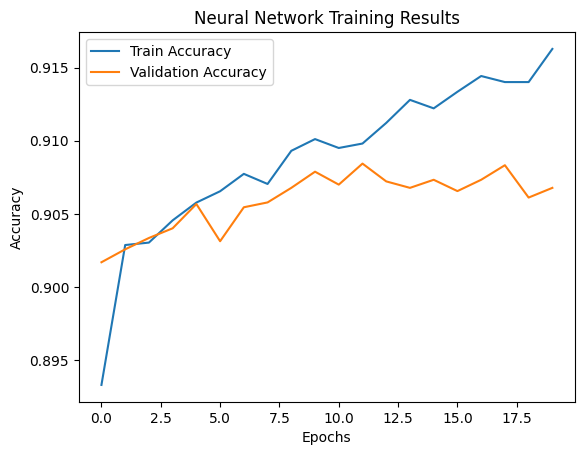


Neural Network Accuracy: 0.91

Results: {'Random Forest Accuracy': 0.9036824062811014, 'Neural Network Accuracy': 0.9067787528038025}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Mount Google Drive (for Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Dataset path
data_set = '/content/drive/My Drive/Assignments/ML_CW_Mindiya/bank-full.csv'

# Load dataset
try:
    data = pd.read_csv(data_set, sep=';', engine='python')
except FileNotFoundError:
    print(f"File not found at {data_set}. Please check the path.")
    exit()

# Display data overview
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

print("First 5 rows of the dataset:")
print(data.head())

print("\nColumn Information:")
data.info()

print("\nStatistical Summary:")
print(data.describe())

# Encode target variable and categorical features
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])
data_encoded = pd.get_dummies(data, drop_first=True)

# Check target column
if 'y' not in data_encoded.columns:
    print("Target column 'y' is missing after encoding. Exiting.")
    exit()

# Feature and target split
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split complete:")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Model
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
print("\nRandom Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

conf_matrix = confusion_matrix(y_test, rf_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Neural Network Model
nn_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Neural Network
history = nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot Training Results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Neural Network Training Results')
plt.show()

# Neural Network Evaluation
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"\nNeural Network Accuracy: {nn_accuracy:.2f}")

# Results
results = {
    "Random Forest Accuracy": accuracy_score(y_test, rf_predictions),
    "Neural Network Accuracy": nn_accuracy
}

print("\nResults:", results)